In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly as py
import plotly.io
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

from plotly.offline import  download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = True)
cf.go_offline()

### INFO

I'm using interactive regime which compiles in 1st cell, but for GitHib pull I switch render to 'svg'

In [2]:
py.io.renderers.default = 'svg'
py.io.renderers

Renderers configuration
-----------------------
    Default renderer: 'svg'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

# Configs

In [3]:
def font_config(
        size: int
        ) -> dict:

    temp_config = dict(
        family = 'Arial',
        size = size,
        color = 'white',
        )

    return temp_config


x_axis_config = dict(
        showline = False,
        showgrid = True,
        showticklabels = True,
        linecolor = 'white',
        linewidth = 1,
        ticks = 'outside',
        tickfont = font_config(size = 18)
        )

y_axis_config = dict(
        showline = False,
        showgrid = True,
        showticklabels = True,
        linecolor = 'white',
        linewidth = 1,
        ticks = 'outside',
        tickfont = font_config(size = 18)
        )

margin_config = dict(
        autoexpand = True,
        l = 100,
        r = 20,
        t = 80,
        b = 20
        )

legend_config = dict(
        font = font_config(18)
        )

# Violin plots

In [4]:
df_tips = px.data.tips()
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
fig = px.violin(
        data_frame = df_tips,
        x = 'day',
        y = 'total_bill',
        color = 'sex',
        box = True,
        points = 'all',
        violinmode = 'group',
        category_orders = {
            'sex':['Male', 'Female']
            },
        hover_data = df_tips.columns,
        #facet_col = 'sex',
        #facet_row = 'day'
        )

fig = fig.update_layout(
        height = 800,
        width = 1400
        )

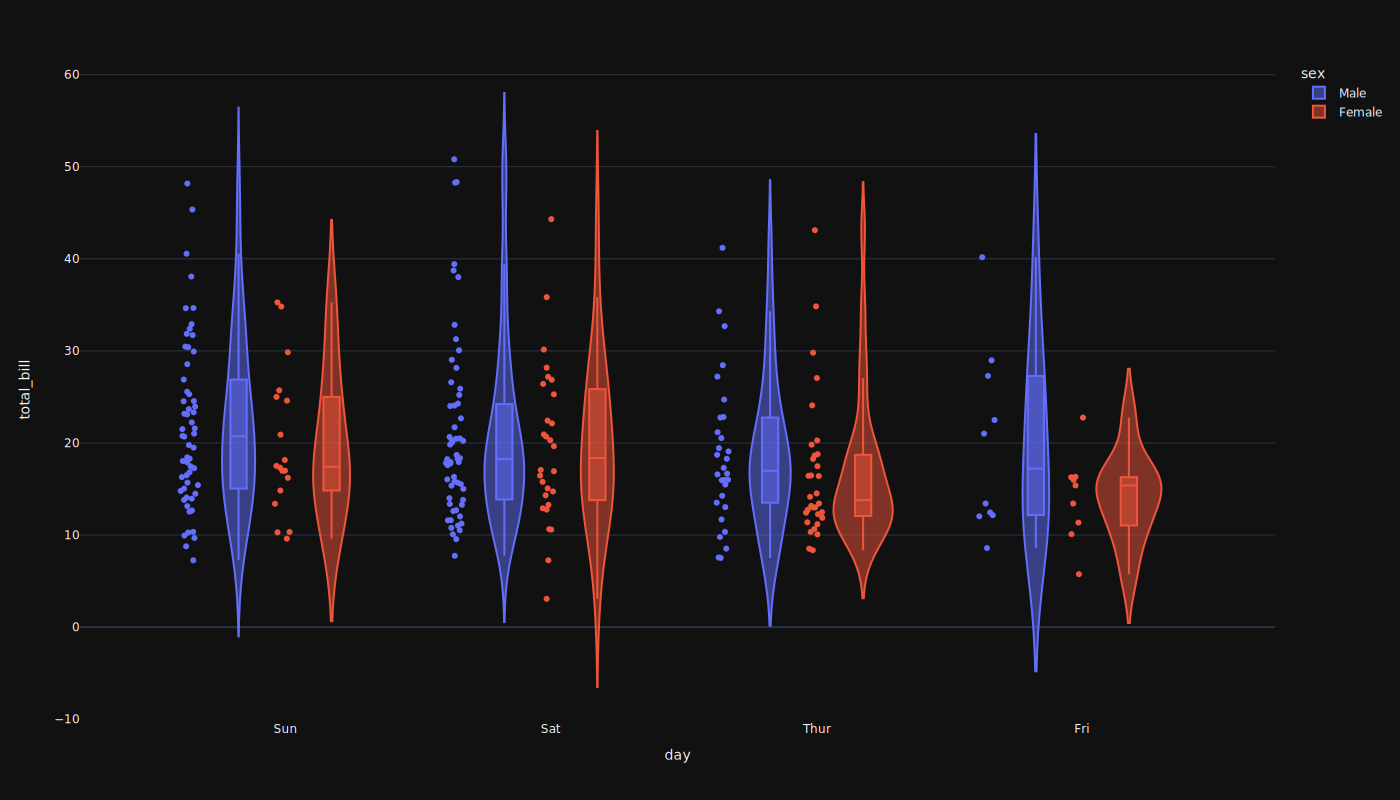

In [10]:
fig.show()

In [7]:
df_smoker_yes: pd.DataFrame = df_tips.query("smoker == 'Yes'")
df_smoker_no:pd.DataFrame = df_tips.query("smoker == 'No'")

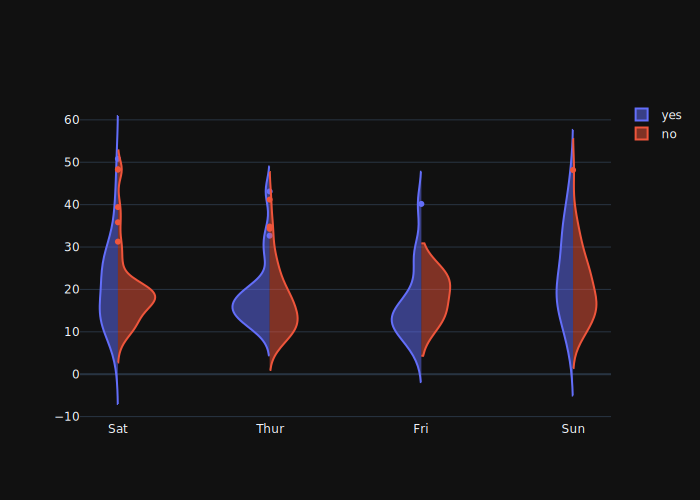

In [8]:
fig = go.Figure()

fig = fig.add_traces([
        go.Violin(
                x = df_smoker_yes.day,
                y = df_smoker_yes.total_bill,
                legendgroup = 'Yes',
                side = 'negative',
                name = 'yes'
                ),

        go.Violin(
                x = df_smoker_no.day,
                y = df_smoker_no.total_bill,
                legendgroup = 'Yes',
                side = 'positive',
                name = 'no'
                )
        ])

fig.show()